# Colab에서 한글 폰트 사용하기


## step 1. Colab 가상머신에 한글 폰트 설치

In [1]:
# Colab Jupyter Notebook에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,895 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and dire

## step 2 . Colab Runtime 재시작(Ctrl + M)

## step 3. `matplotlib.pyplot` 모듈에서 한글 폰트를 사용할 수 있도록 설정

In [2]:
import matplotlib.pyplot as plt

# matplotlib.pyplot 모듈에서 사용할 폰트 패밀리 한글로 설정
plt.rc('font', family='NanumBarunGothic')

## 한글 폰트 테스트

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.DataFrame(data = {
    '구': ['서초구' , '강남구' , '송파구'],
    '가격': [9_000, 10_000, 8_500]
})

In [5]:
df

,구,가격
0,서초구,9000
1,강남구,10000
2,송파구,8500


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

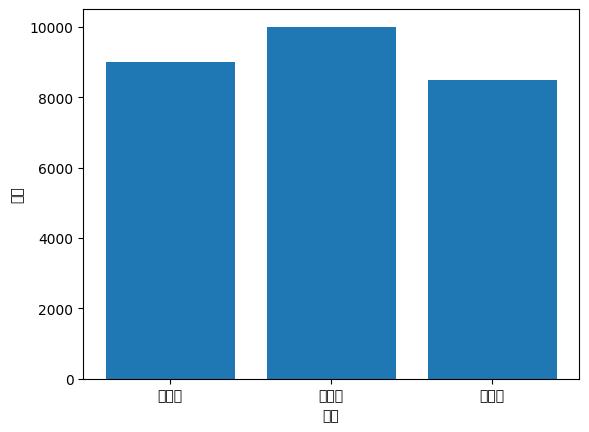

In [6]:
plt.bar(x = df['구'], height = df['가격'])
plt.xlabel('지역')
plt.ylabel('가격')
plt.show()

# 아파트 실거래가 데이터 분석


*   [apt_202504.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   첫 15줄은 파일 설명 문서 -> skip
    *   encoding 파라미터 설정(한글 인코딩: euc-kr)
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    *   '인천광역시 부평구 부평동' -> '인천광역시'
    *   '충청남도 천안시 서북구' -> '충청남도'
*   '시군구' 컬럼의 값을 이용해서, county 파생 변수(시/군/구)를 만듦.
    *   '인천광역시 부평구 부평동' -> '부평구'
    *   '충청남도 천안시 서북구' -> '천안시'
*   '계약년월' 컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 rn별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

In [74]:
apt_file = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv'

In [75]:
apt = pd.read_csv(apt_file, skiprows= 15, sep = ',', encoding= 'euc-kr')

In [76]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,"17,355",-,3,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,"57,800",-,23,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,"41,000",-,22,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,"73,850",2,15,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,"86,200",-,20,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-


In [77]:
apt['거래금액(만원)'] = apt['거래금액(만원)'].str.replace(',','').astype(int)

In [78]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         36974 non-null  object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   36974 non-null  object 
 17  거래유형      36974 non-null  object 
 18  중개사소재지    36974 non-null  object 
 19  등기일자      36974 non-null  object 
dtypes: float64(1), int64(8), obj

In [79]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,-,3,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,-,23,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,-,22,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,-,20,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-


In [80]:
apt.tail()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,-,27,개인,개인,2020,해양5로 17,-,중개거래,"경기 시흥시, 경기 안산시 상록구",-
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,-,5,개인,개인,2020,해양5로 17,-,중개거래,"경기 안산시 상록구, 서울 구로구",-
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,-,4,개인,개인,1992,선진로 108,-,중개거래,경기 안산시 상록구,-
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,-,12,개인,개인,1995,판교로 669,-,중개거래,경기 성남시 분당구,-
36973,36974,울산광역시 동구 전하동,682-1,682,1,삼전아이필하모니,84.5300,202504,1,21500,-,15,개인,개인,2006,방어진순환도로 733,-,중개거래,울산 동구,-


In [81]:
apt['거래금액(만원)'].describe()

,거래금액(만원)
count,3.697400e+04
mean,4.348493e+04
std,4.163910e+04
min,1.200000e+03
25%,1.820000e+04
50%,3.370000e+04
75%,5.550000e+04
max,1.050000e+06


In [82]:
#'시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
province = apt['시군구'].str.split()
province1 = province.str[0]
province1

,시군구
0,인천광역시
1,인천광역시
2,인천광역시
3,서울특별시
4,서울특별시
...,...
36969,경기도
36970,경기도
36971,경기도
36972,경기도


In [83]:
apt['province']= province1

In [84]:
apt

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,3,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,23,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,22,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,15,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,20,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,...,27,개인,개인,2020,해양5로 17,-,중개거래,"경기 시흥시, 경기 안산시 상록구",-,경기도
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,...,5,개인,개인,2020,해양5로 17,-,중개거래,"경기 안산시 상록구, 서울 구로구",-,경기도
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,...,4,개인,개인,1992,선진로 108,-,중개거래,경기 안산시 상록구,-,경기도
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,...,12,개인,개인,1995,판교로 669,-,중개거래,경기 성남시 분당구,-,경기도


In [85]:
apt['county'] = apt['시군구'].str.split().str[1]

In [86]:
apt

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시,부평구
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시,동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,...,개인,개인,2020,해양5로 17,-,중개거래,"경기 시흥시, 경기 안산시 상록구",-,경기도,안산시
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,...,개인,개인,2020,해양5로 17,-,중개거래,"경기 안산시 상록구, 서울 구로구",-,경기도,안산시
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,...,개인,개인,1992,선진로 108,-,중개거래,경기 안산시 상록구,-,경기도,안산시
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,...,개인,개인,1995,판교로 669,-,중개거래,경기 성남시 분당구,-,경기도,성남시


In [87]:
#'계약년월' 컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
apt['year'] = apt['계약년월']//100
apt

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시,부평구,2025
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구,2025
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,개인,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시,동대문구,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,...,개인,2020,해양5로 17,-,중개거래,"경기 시흥시, 경기 안산시 상록구",-,경기도,안산시,2025
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,...,개인,2020,해양5로 17,-,중개거래,"경기 안산시 상록구, 서울 구로구",-,경기도,안산시,2025
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,...,개인,1992,선진로 108,-,중개거래,경기 안산시 상록구,-,경기도,안산시,2025
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,...,개인,1995,판교로 669,-,중개거래,경기 성남시 분당구,-,경기도,성남시,2025


In [88]:
apt['month'] = apt['계약년월']%100
apt

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시,부평구,2025,4
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025,4
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시,동대문구,2025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,...,2020,해양5로 17,-,중개거래,"경기 시흥시, 경기 안산시 상록구",-,경기도,안산시,2025,4
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,...,2020,해양5로 17,-,중개거래,"경기 안산시 상록구, 서울 구로구",-,경기도,안산시,2025,4
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,...,1992,선진로 108,-,중개거래,경기 안산시 상록구,-,경기도,안산시,2025,4
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,...,1995,판교로 669,-,중개거래,경기 성남시 분당구,-,경기도,성남시,2025,4


In [89]:
apt['거래금액(만원)'].describe()

,거래금액(만원)
count,3.697400e+04
mean,4.348493e+04
std,4.163910e+04
min,1.200000e+03
25%,1.820000e+04
50%,3.370000e+04
75%,5.550000e+04
max,1.050000e+06


In [90]:
apt[(apt['거래금액(만원)'] == apt['거래금액(만원)'].min()) |
    (apt['거래금액(만원)'] == apt['거래금액(만원)'].max())]

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
7430,7431,서울특별시 강남구 압구정동,369-1,369,1,"현대2차(10,11,20,23,24,25동)",198.41,202504,23,1050000,...,1976,압구정로29길 71,-,중개거래,서울 강남구,-,서울특별시,강남구,2025,4
7698,7699,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,23,1200,...,1997,동신길 70,-,직거래,-,-,전라남도,고흥군,2025,4
9811,9812,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,21,1200,...,1997,동신길 70,-,직거래,-,25.04.29,전라남도,고흥군,2025,4


In [91]:
seoul_df = apt[apt.province == '서울특별시']

In [92]:
seoul_df.pivot_table(values='거래금액(만원)', index='county', aggfunc=['max', 'min', 'mean'])

,max,min,mean
,거래금액(만원),거래금액(만원),거래금액(만원)
county,,,
강남구,1050000,16000,398812.068966
강동구,233000,10200,112508.016878
강북구,112000,8500,67638.311688
강서구,201000,9500,84419.214876
관악구,125000,10300,79354.666667
광진구,317000,13900,128171.293103
구로구,165000,10700,70238.942308
금천구,115500,8900,62259.574468


---

In [58]:
#서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최솟값, 최댓값
apt.pivot_table(values = ['거래금액(만원)'], index= ['county'], aggfunc= ['mean', 'min', 'max'])

,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원)
county,,,
가평군,19283.333333,9000,42500
강남구,398812.068966,16000,1050000
강동구,112508.016878,10200,233000
강릉시,23836.761364,4000,64500
강북구,67638.311688,8500,112000
...,...,...,...
홍천군,14988.709677,6000,37800
화성시,52136.037371,3300,187000


In [59]:
# 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값
apt.pivot_table(values = ['거래금액(만원)'], index = ['province'], aggfunc= ['mean' , 'min' , 'max'])

,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원)
province,,,
강원특별자치도,21880.036921,1500,95000
경기도,51585.387342,3000,369000
경상남도,24180.064088,1500,166000
경상북도,18005.839506,1500,72000
광주광역시,29210.827014,3650,168000
대구광역시,33990.820787,2900,247500
대전광역시,34653.980541,3480,210000
부산광역시,39717.544049,2300,498000


In [60]:
# 면적이  84m2  이상  100m2  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값
size = apt[(apt['전용면적(㎡)']>= 84) & (apt['전용면적(㎡)']<100)]
size

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구,2025,4
5,6,대구광역시 달서구 월성동,89,89,0,서한맨션,84.8100,202504,30,20000,...,1992,학산로 15,-,중개거래,대구 달서구,-,대구광역시,달서구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.8200,202504,30,262000,...,2006,잠실로 88,-,중개거래,"서울 광진구, 서울 송파구",-,서울특별시,송파구,2025,4
9,10,부산광역시 북구 만덕동,962,962,0,이편한세상금정산,84.9378,202504,30,46200,...,2021,상학로 36,-,중개거래,부산 북구,-,부산광역시,북구,2025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36967,36968,세종특별자치시 새롬동,614,614,0,새뜸마을12단지(금성백조예미지),84.9936,202504,1,75000,...,2017,새롬남로 102,-,중개거래,세종,-,세종특별자치시,새롬동,2025,4
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,...,2020,해양5로 17,-,중개거래,"경기 시흥시, 경기 안산시 상록구",-,경기도,안산시,2025,4
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,...,2020,해양5로 17,-,중개거래,"경기 안산시 상록구, 서울 구로구",-,경기도,안산시,2025,4
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,...,1995,판교로 669,-,중개거래,경기 성남시 분당구,-,경기도,성남시,2025,4


In [61]:
size_seoul = size[size['province'] == '서울특별시']
size_seoul

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.8200,202504,30,262000,...,2006,잠실로 88,-,중개거래,"서울 광진구, 서울 송파구",-,서울특별시,송파구,2025,4
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.0250,202504,30,122000,...,2015,영신로55길 8,-,중개거래,"서울 마포구, 서울 영등포구",25.04.30,서울특별시,영등포구,2025,4
13,14,서울특별시 강북구 미아동,1353,1353,0,에스케이북한산시티,84.7600,202504,30,72000,...,2004,솔샘로 174,-,중개거래,서울 강북구,-,서울특별시,강북구,2025,4
28,29,서울특별시 동작구 흑석동,339,339,0,흑석한강센트레빌Ⅱ,84.9460,202504,30,172000,...,2012,서달로 91,-,중개거래,서울 동작구,-,서울특별시,동작구,2025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36607,36608,서울특별시 동대문구 용두동,794,794,0,용두롯데캐슬리치,84.5011,202504,1,90000,...,2015,한빛로 73,-,중개거래,인천 중구,-,서울특별시,동대문구,2025,4
36610,36611,서울특별시 구로구 고척동,334,334,0,벽산,84.8780,202504,1,90500,...,2003,경인로 390,-,중개거래,서울 구로구,-,서울특별시,구로구,2025,4
36612,36613,서울특별시 구로구 개봉동,480,480,0,현대홈타운,84.9150,202504,1,77500,...,2001,개봉로20길 158,-,중개거래,서울 구로구,-,서울특별시,구로구,2025,4
36627,36628,서울특별시 마포구 성산동,601,601,0,성산월드타운대림,84.6890,202504,1,96000,...,2004,월드컵북로30길 9-22,-,중개거래,서울 마포구,-,서울특별시,마포구,2025,4


In [62]:
size_seoul.pivot_table(values = ['거래금액(만원)'], index = 'county', aggfunc=['mean', 'min','max'] )

,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원)
county,,,
강남구,273350.000000,140000,381000
강동구,121548.148148,59700,204000
강북구,74869.642857,44000,96750
강서구,103374.626866,48500,151000
관악구,89050.000000,50000,125000
광진구,140078.571429,58000,205000
구로구,79764.864865,45000,158000
금천구,73416.666667,48000,115500


In [63]:
# 면적이  84m2  이상  100m2  미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
a = size.pivot_table(values = ['거래금액(만원)'], index= 'province', aggfunc=['mean', 'min','max'])
a

,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원)
province,,,
강원특별자치도,30231.482222,5000,75000
경기도,57321.139164,12000,253000
경상남도,30878.494516,4700,98000
경상북도,25667.686869,3500,58500
광주광역시,35489.587156,9309,84000
대구광역시,40417.328413,12000,155000
대전광역시,42061.058952,13000,111000
부산광역시,48326.880215,10000,145000


In [64]:
a.columns = ['mean','min', 'max']
a

,mean,min,max
province,,,
강원특별자치도,30231.482222,5000,75000
경기도,57321.139164,12000,253000
경상남도,30878.494516,4700,98000
경상북도,25667.686869,3500,58500
광주광역시,35489.587156,9309,84000
대구광역시,40417.328413,12000,155000
대전광역시,42061.058952,13000,111000
부산광역시,48326.880215,10000,145000
서울특별시,117148.783474,44000,381000


In [65]:
#결과를 평균의 내림차순으로 정렬해서 출력
a.sort_values(by = ['mean'], ascending = False)

,mean,min,max
province,,,
서울특별시,117148.783474,44000,381000
세종특별자치시,60490.846287,16500,134000
경기도,57321.139164,12000,253000
부산광역시,48326.880215,10000,145000
인천광역시,46944.105402,13000,117500
울산광역시,44515.697674,6000,100500
제주특별자치도,42697.959184,16500,80000
대전광역시,42061.058952,13000,111000
대구광역시,40417.328413,12000,155000


In [66]:
# 결과를 최댓값의 내림차순으로 정렬해서 출력
a.sort_values(by= ['max'], ascending = False)

,mean,min,max
province,,,
서울특별시,117148.783474,44000,381000
경기도,57321.139164,12000,253000
대구광역시,40417.328413,12000,155000
부산광역시,48326.880215,10000,145000
세종특별자치시,60490.846287,16500,134000
인천광역시,46944.105402,13000,117500
대전광역시,42061.058952,13000,111000
울산광역시,44515.697674,6000,100500
경상남도,30878.494516,4700,98000


In [67]:
# 결과를 최솟값의 오름차순으로 정렬해서 출력
a.sort_values(by=['min'], ascending = True)

,mean,min,max
province,,,
경상북도,25667.686869,3500,58500
전북특별자치도,30469.994941,4000,79500
전라남도,24268.147368,4500,49300
경상남도,30878.494516,4700,98000
강원특별자치도,30231.482222,5000,75000
울산광역시,44515.697674,6000,100500
충청남도,27286.211268,6700,84000
충청북도,32607.755102,7700,68500
광주광역시,35489.587156,9309,84000


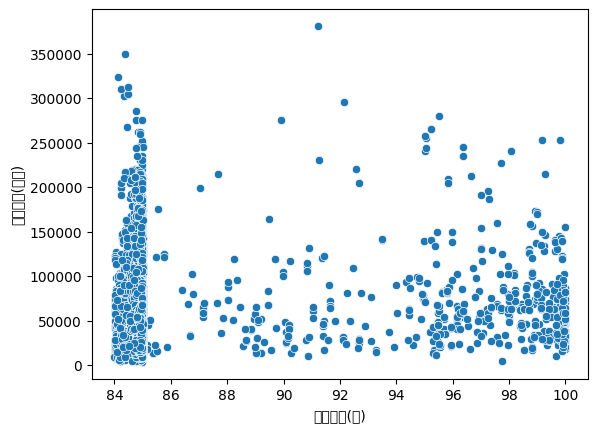

In [68]:
sns.scatterplot(data = size, x = '전용면적(㎡)', y = '거래금액(만원)')
plt.show()

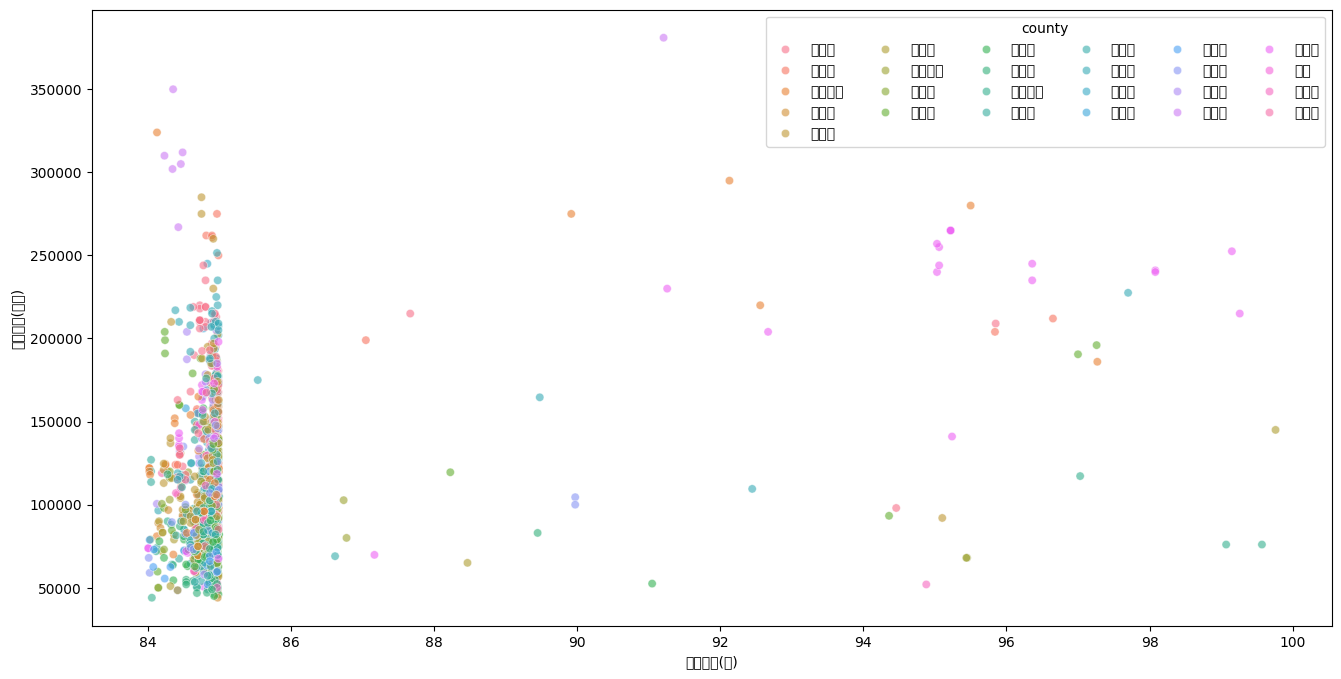

In [69]:
fig, size = plt.subplots(figsize = (16,8))
sns.scatterplot(data = size_seoul, x = '전용면적(㎡)', y = '거래금액(만원)', hue= 'county', alpha= 0.6)
plt.legend(title='county', loc='upper right', bbox_to_anchor=(1, 1), ncol=6, frameon= True)
plt.show()

In [70]:
import plotly.express as px

In [71]:
fig = px.scatter(size_seoul, x = '전용면적(㎡)', y= '거래금액(만원)', color = 'county', hover_data =  ['단지명', '시군구', '계약년월', '거래금액(만원)'] )
fig.show()

In [72]:
size_seoul

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.8200,202504,30,262000,...,2006,잠실로 88,-,중개거래,"서울 광진구, 서울 송파구",-,서울특별시,송파구,2025,4
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.0250,202504,30,122000,...,2015,영신로55길 8,-,중개거래,"서울 마포구, 서울 영등포구",25.04.30,서울특별시,영등포구,2025,4
13,14,서울특별시 강북구 미아동,1353,1353,0,에스케이북한산시티,84.7600,202504,30,72000,...,2004,솔샘로 174,-,중개거래,서울 강북구,-,서울특별시,강북구,2025,4
28,29,서울특별시 동작구 흑석동,339,339,0,흑석한강센트레빌Ⅱ,84.9460,202504,30,172000,...,2012,서달로 91,-,중개거래,서울 동작구,-,서울특별시,동작구,2025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36607,36608,서울특별시 동대문구 용두동,794,794,0,용두롯데캐슬리치,84.5011,202504,1,90000,...,2015,한빛로 73,-,중개거래,인천 중구,-,서울특별시,동대문구,2025,4
36610,36611,서울특별시 구로구 고척동,334,334,0,벽산,84.8780,202504,1,90500,...,2003,경인로 390,-,중개거래,서울 구로구,-,서울특별시,구로구,2025,4
36612,36613,서울특별시 구로구 개봉동,480,480,0,현대홈타운,84.9150,202504,1,77500,...,2001,개봉로20길 158,-,중개거래,서울 구로구,-,서울특별시,구로구,2025,4
36627,36628,서울특별시 마포구 성산동,601,601,0,성산월드타운대림,84.6890,202504,1,96000,...,2004,월드컵북로30길 9-22,-,중개거래,서울 마포구,-,서울특별시,마포구,2025,4


In [73]:
size_seoul[size_seoul['단지명'] == '디에이치아너힐즈']

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
12931,12932,서울특별시 강남구 개포동,1281,1281,0,디에이치아너힐즈,84.357,202504,18,350000,...,2019,삼성로 11,-,중개거래,서울 강남구,-,서울특별시,강남구,2025,4
